### Optimización de Markowitz


#### Objetivo
El objetivo es estimar la frontera eficiente de la teporía de optimización de portafolio de Markowitz

#### Cargando las librerías

In [3]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
assets = ["PG", "^GSPC"]
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = "yahoo", start = "2010-1-1")["Adj Close"]

In [5]:
pf_data.head()

,PG,^GSPC
Date,,
2010-01-04,42.245060,1132.989990
2010-01-05,42.258884,1136.520020
2010-01-06,42.058445,1137.140015
2010-01-07,41.830349,1141.689941
2010-01-08,41.775063,1144.979980


In [6]:
pf_data.tail()

,PG,^GSPC
Date,,
2022-03-30,154.389999,4602.450195
2022-03-31,152.800003,4530.410156
2022-04-01,155.089996,4545.859863
2022-04-04,154.080002,4582.640137
2022-04-05,154.619995,4525.120117


<AxesSubplot:xlabel='Date'>

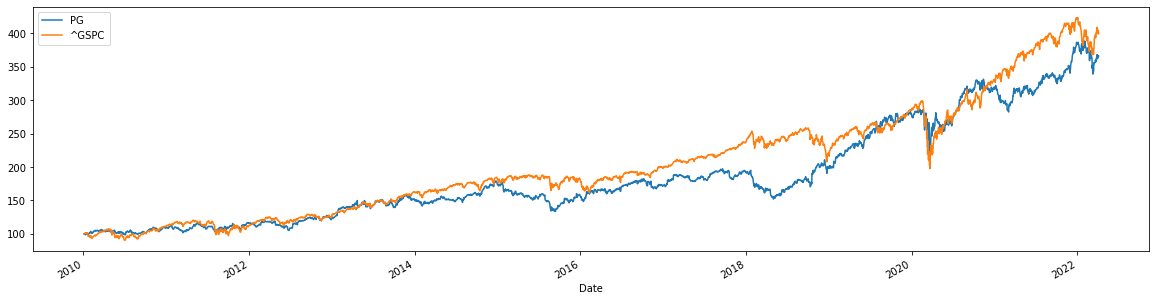

In [13]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(20,5))
#Se puede apreciar la caída de la serie tomando como año base el primer día de 2010, por el COVID-19  a inicios de 2020.

In [8]:
log_retorno = np.log(pf_data / pf_data.shift(1))

In [9]:
log_retorno.mean()*250

PG       0.105144
^GSPC    0.112219
dtype: float64

In [39]:
#matriz de covarianzas
log_retorno.cov()*250

,PG,^GSPC
PG,0.028869,0.016818
^GSPC,0.016818,0.029772


In [40]:
#matriz de correlaciones
log_retorno.corr()

,PG,^GSPC
PG,1.000000,0.573665
^GSPC,0.573665,1.000000


In [41]:
num_assets = len(assets)

In [42]:
num_assets

2

In [44]:
arr = np.random.random(2)
arr

array([0.74104747, 0.99772571])

In [45]:
arr[0] + arr[1]

1.7387731845911896

In [55]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weigths

array([0.38241652, 0.52154137])

In [60]:
weigths[0] + weigths[1]
#  la suma tendría que ser uno

0.9039578931269384

#### Retorno estimado del portafolio

In [56]:
np.sum(weights * log_retorno.mean())*250

0.11153558848986404

#### Varianza estimada del portafolio

In [57]:
np.dot(weights.T, np.dot(log_retorno.cov()*250, weights))

0.0275020144399298

#### Volatilidad (desv.std) esperada del portafolio

In [59]:
np.sqrt(np.dot(weights.T, np.dot(log_retorno.cov()*250, weights)))

0.16583731317146272

In [63]:
#Simulación de 1000 veces la combinación de los dos activos
pfolio_retorno = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_retorno.append(np.sum(weights*log_retorno.mean())*250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_retorno.cov()*250, weights))))
    
pfolio_retorno, pfolio_volatilities

([0.11009440145971468,
  0.10925639738358436,
  0.1083134690249213,
  0.1112201105349839,
  0.11027034068945474,
  0.1078961458701872,
  0.10687836258578343,
  0.10922766478655276,
  0.10962949450908384,
  0.10564300672877194,
  0.10938161801766785,
  0.10937463349275432,
  0.10846579883408923,
  0.1104161602630313,
  0.1078081938618499,
  0.10977274304056273,
  0.10705640024406965,
  0.11023970766687212,
  0.11028921595800434,
  0.10854753752593731,
  0.1090038069006118,
  0.10739757851610453,
  0.10908493916614656,
  0.10766419349049193,
  0.11035793946469004,
  0.10897065136507532,
  0.11176990535101468,
  0.11150459933423204,
  0.11013359475882664,
  0.10961284763950284,
  0.10796360333770953,
  0.10829467219234916,
  0.10833378939441324,
  0.10576647895498296,
  0.10894775286317326,
  0.10915488851916964,
  0.11209968827082858,
  0.11128149277167164,
  0.1101798028540432,
  0.10762992660913186,
  0.11053849535940712,
  0.10857554211746656,
  0.10900765579861607,
  0.10763506163141

In [66]:
pfolio_retorno = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_retorno.append(np.sum(weights*log_retorno.mean())*250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_retorno.cov()*250, weights))))
    

pfolio_retorno = np.array(pfolio_retorno)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_retorno, pfolio_volatilities

(array([0.11015211, 0.10733412, 0.10686792, 0.10982647, 0.10635882,
        0.11120934, 0.10883279, 0.10721598, 0.1085194 , 0.10950852,
        0.10865738, 0.10831595, 0.1104504 , 0.10652242, 0.10681916,
        0.1118541 , 0.11209666, 0.10886781, 0.11014477, 0.11076967,
        0.1083687 , 0.10868989, 0.10820323, 0.10551121, 0.10645286,
        0.11087782, 0.10860851, 0.10879371, 0.10741867, 0.10590411,
        0.10748244, 0.10741544, 0.10970043, 0.10904878, 0.10665975,
        0.11179646, 0.10923892, 0.10793989, 0.10809776, 0.11002813,
        0.10974625, 0.10812384, 0.11137781, 0.10874124, 0.11039378,
        0.10619384, 0.10855878, 0.11154688, 0.10894973, 0.1092389 ,
        0.10870575, 0.10553536, 0.10731417, 0.10813927, 0.10702794,
        0.10959184, 0.10769455, 0.10708882, 0.10779602, 0.10846343,
        0.11071574, 0.10921821, 0.10962011, 0.10950032, 0.10846225,
        0.1078862 , 0.10875045, 0.10566996, 0.10867047, 0.1073832 ,
        0.10933793, 0.10972876, 0.10856109, 0.10

In [67]:
portfolios = pd.DataFrame({"Retorno": pfolio_retorno, "Volatilidad": pfolio_volatilities})

In [68]:
portfolios.head()

,Retorno,Volatilidad
0,0.110152,0.156003
1,0.107334,0.154288
2,0.106868,0.156466
3,0.109826,0.154499
4,0.106359,0.159590


In [69]:
portfolios.tail()

,Retorno,Volatilidad
995,0.107817,0.152749
996,0.111664,0.167008
997,0.110234,0.156432
998,0.111295,0.163747
999,0.108247,0.152014


Text(0, 0.5, 'Retorno Estimado')

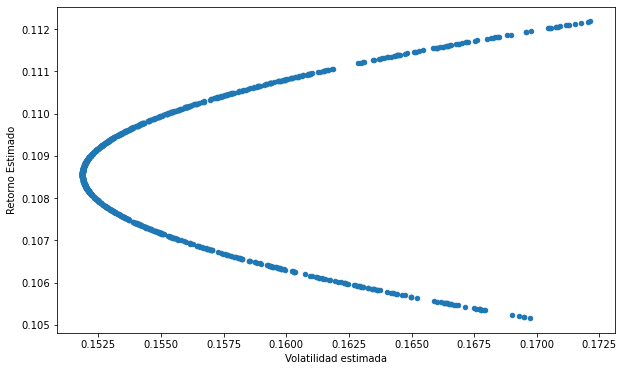

In [73]:
portfolios.plot(x="Volatilidad", y="Retorno", kind="scatter", figsize=(10,6))
plt.xlabel("Volatilidad estimada")
plt.ylabel("Retorno Estimado")